### Exploratory Data Analysis into the relationships, patterns, and trends that exist between MTA Subway Ridership (2020-2024) & Major Incidents

___

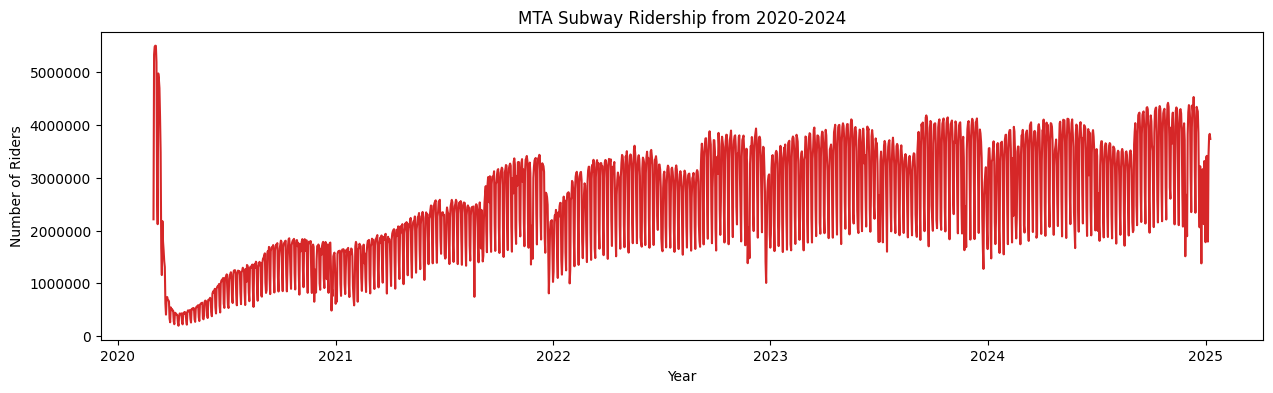

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Read combined_df.csv
dfc = pd.read_csv("/Users/leilastambuli/Documents/Portfolio-Project/combined_df.csv")

#Convert "date" column into datetime object
dfc["date"] = pd.to_datetime(dfc["date"])

#Create function to set up Time Series Visualization
def plot_dfc(dfc, x, y, title="", xlabel='Year', ylabel='Number of Riders', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 
    plt.show()
    
#Plot time series visualization using the date and subways_total_estimated_ridership columns
plot_dfc(dfc, x=dfc['date'], y=dfc['subways_total_estimated_ridership'], title='MTA Subway Ridership from 2020-2024')


### _Insights Regarding Overall Annual MTA Subway Ridership from 2020 to January 2025_

__Chart Info:__ This time series visualization shows the MTA Ridership by year from 2020 to 2024, including one month of ridership data from January 2025. 

As was expected, there is a steep drop in ridership from 2020 to 2021 due to the Pandemic. With schools and most businesses closed, most major events cancelled, and low to non-existent tourism combined with adherence to lockdown policies that limited train availability (among many other factors), the glaring difference between 2020 ridership and ridership from the proceeding years is no surprise.

From 2021 onward, MTA Subway ridership gradually increases over time, but even as of January 2025 - ridership still has yet to reach pre-Pandemic levels.

<Figure size 5500x2300 with 0 Axes>

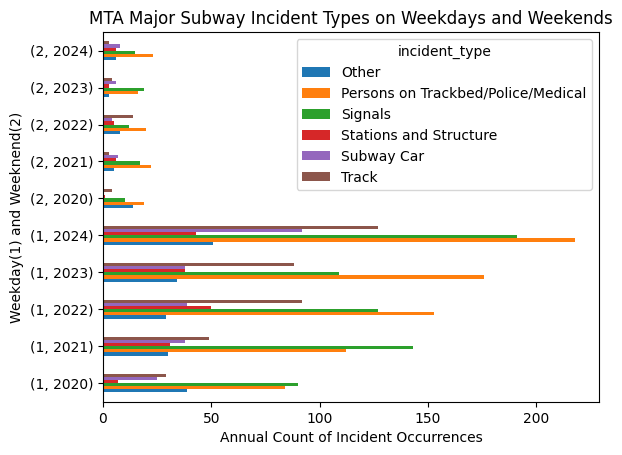

<Figure size 5500x2300 with 0 Axes>

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Read the incidents.csv file
dfi = pd.read_csv("/Users/leilastambuli/Documents/Portfolio-Project/incidents.csv")

#Convert "date" column into datetime object then extract the year only
dfi["date"] = pd.to_datetime(dfi["date"])
dfi["year"] = dfi["date"].dt.year

#Pivot the data from the dfi dataframe
pivot_dfi = dfi.pivot_table(index=["wday_wnd", "year"], columns="incident_type", values="incident_count", aggfunc="sum").plot.barh()

#Customize x and y labels, tick values of x & y axes
plt.gca().set(title="MTA Major Subway Incidents on Weekdays and Weekends by Type", xlabel="Annual Count of Incident Occurrences", ylabel="Weekday(1) and Weeknend(2)")

#Increase figure size
plt.figure(figsize=(55, 23))

### _Major Incidents_ 
Major Incidents are occurrences that delay 50 or more trains. These are the most likely to cause the highest about of disruption for MTA Subway Riders.

### _The types of incidents tracked by the MTA include:_ 
- __Track:__ Track incidents have a variety of root causes including low quality maintenance (especially when trains are moving at high speed), mistakes and confusion from train operators (this includes ignoring signals, incorrect breaking, and even speeding)
- __Persons on Trackbed/Police/Medical__
- __Signals:__ The various types Signals in the MTA Subway System are manually operated by human operators in signal towers, not automatically by the trains themselves. They are meant to prevent track divergences, control train speed, maintain safe train operation around curves, detect issues with wheels and more. The infrastructure of the MTA Subway system is severely in need of 21st century upgrades and lags behind most comparable subway infrastructures globally
- __Stations and Structure__
- __Subway Car__
- __Other__

### _Insights/Analysis_

- This grouped bar graph measures the annual count of incident occurrences, grouped by respective year and whether they happened on weekday or weekend.

- The Weekdays host more incident occurrences overall as there are, on average, more riders during the weekday - creating more opportunity for accidents to happen.

- The most frequently occurring incident regardless of weekday/weekend or year = Persons on Trackbed/Police/Medical, followed by Signal incidents, then Track incidents.


(<Figure size 640x480 with 25 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object))

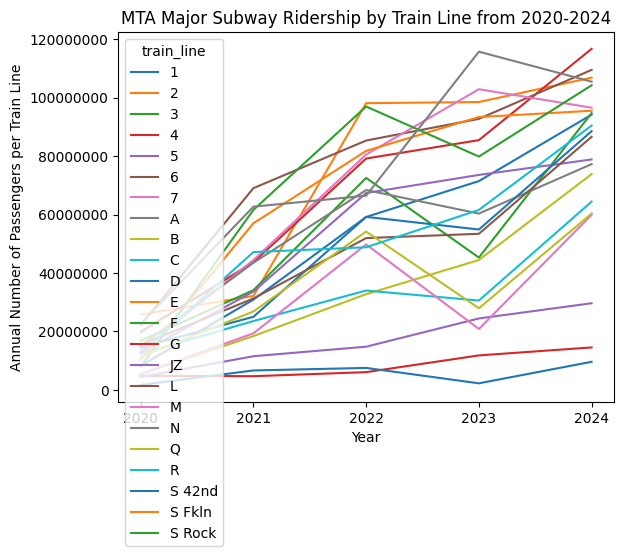

<Figure size 7500x4000 with 0 Axes>

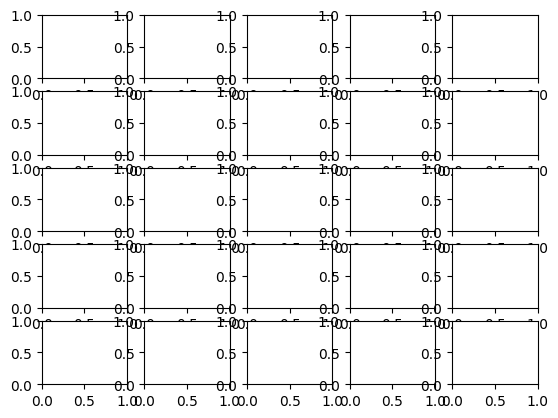

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Read merged_file.csv
dft = pd.read_csv("/Users/leilastambuli/Documents/Portfolio-Project/merged_file.csv")

#Convert "date" column into datetime object then extract the year
dft["date"] = pd.to_datetime(dft["date"])
dft["year"] = dft["date"].dt.year

#Pivot the data from the dft dataframe
pivot_dft = dft.pivot_table(index=["year"], columns="train_line", values="subways_total_estimated_ridership", aggfunc="sum").plot.line()

#Remove scientific notation from y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 

#Change year format of x axis to remove unwanted decimal points
plt.xticks([2020, 2021, 2022, 2023, 2024])

#Customize x and y labels, tick values of x & y axes
plt.gca().set(title="MTA Major Subway Ridership by Train Line from 2020-2024", xlabel="Year", ylabel="Annual Number of Passengers per Train Line")

#Increase figure size, add constrained layout for readability 
plt.figure(figsize=(75, 40), constrained_layout=True)
